In [ ]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(repr)
library(caret)

# fix random seed for reproducibility
set.seed(1234)

path <- "../../" # modifier le nombre de ../ si nécessaire
gym <- read.table(paste(path, "gym_members_exercise_tracking.csv", sep = ""),
                    sep = ",", header = TRUE)

gym[,'Gender'] <- as.factor(gym[,'Gender'])
gym[,'Workout_Type'] <- as.factor(gym[,'Workout_Type'])
gym[,'Experience_Level'] <- as.factor(gym[,'Experience_Level'])
gym[,'Workout_Frequency..days.week.'] <- as.factor(gym[,'Workout_Frequency..days.week.'])

gym[, "Weight..kg."] <- log(gym[,"Weight..kg."])
gym[, "BMI"] <- log(gym[,"BMI"])

max_fat <- max(gym[,"Fat_Percentage"])
gym[, "Fat_Percentage"] <- sqrt((max_fat + 1) - gym[,"Fat_Percentage"])

# renome les variables Weight..kg. et BMI en LWeight et LBMI
names(gym)[names(gym) == "Weight..kg."] <- "LWeight"
names(gym)[names(gym) == "BMI"] <- "LBMI"
names(gym)[names(gym) == "Fat_Percentage"] <- "SFat_Percentage"

# divide data into training and testing sets for experience level
trainIndex <- createDataPartition(gym$Experience_Level, p = .8, 
                                  list = FALSE, 
                                  times = 1)
gym_train <- gym[ trainIndex,]
gym_test  <- gym[-trainIndex,]

# Create X_train and y_train for Experience_Level
X_train_exp_level <- gym_train[, -which(names(gym_train) == "Experience_Level")]
y_train_exp_level <- gym_train$Experience_Level
X_test_exp_level <- gym_test[, -which(names(gym_test) == "Experience_Level")]
y_test_exp_level <- gym_test$Experience_Level

# divide data into training and testing sets for calories burned
trainIndex <- createDataPartition(gym$Calories_Burned, p = .8, 
                                  list = FALSE, 
                                  times = 1)
gym_train_calories <- gym[ trainIndex,]
gym_test_calories  <- gym[-trainIndex,]

# Create X_train and y_train for Calories_Burned
X_train_calories <- gym_train_calories[, -which(names(gym_train_calories) == "Calories_Burned")]
y_train_calories <- gym_train_calories$Calories_Burned
X_test_calories <- gym_test_calories[, -which(names(gym_test_calories) == "Calories_Burned")]
y_test_calories <- gym_test_calories$Calories_Burned

print("Data loaded and preprocessed")


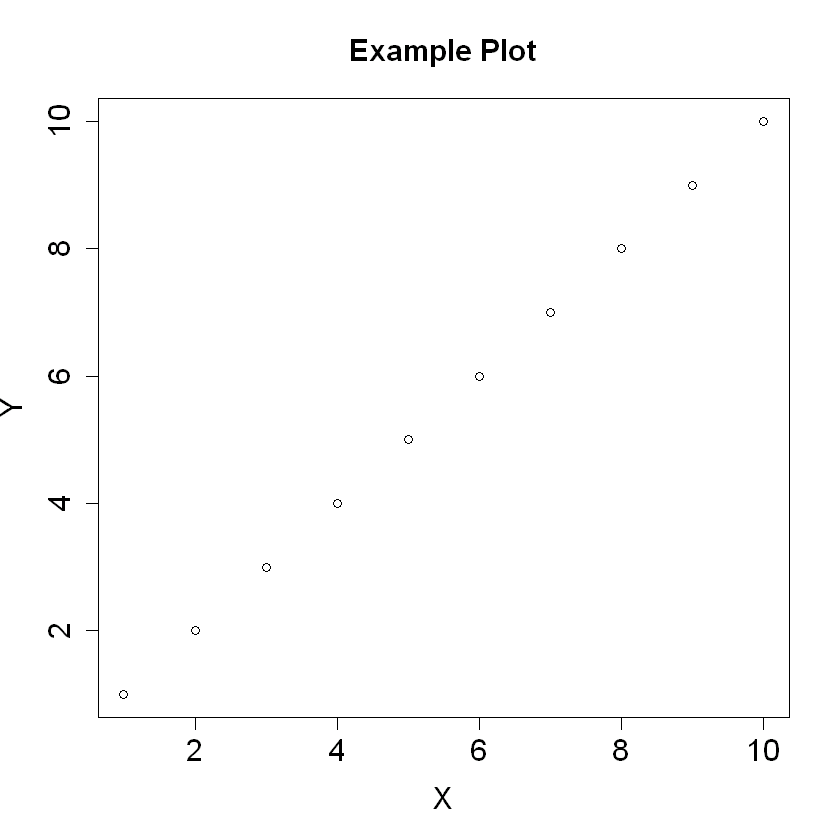

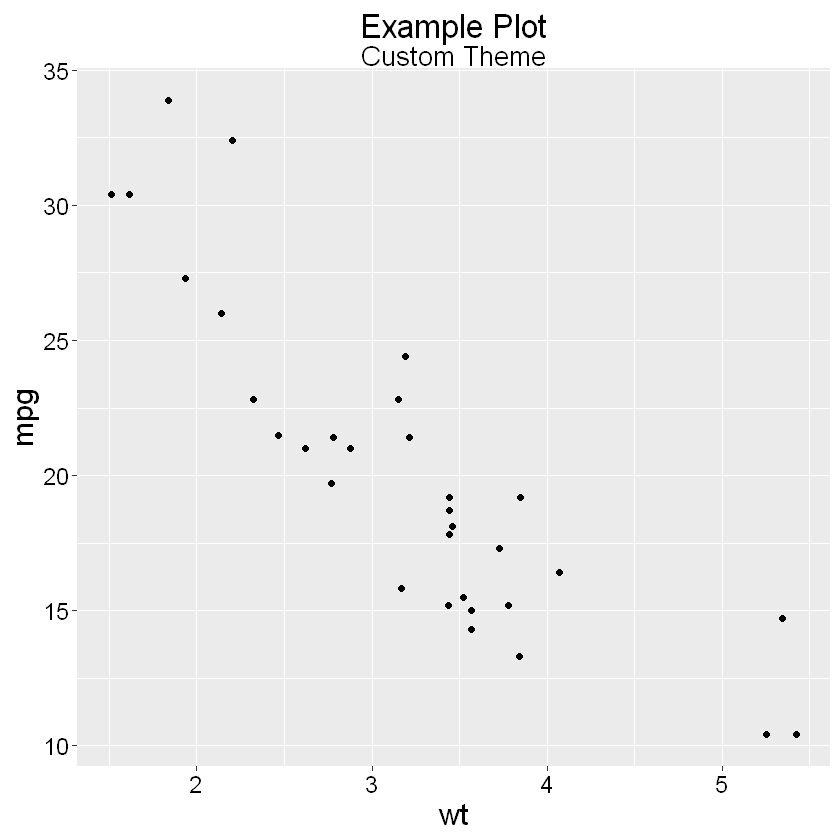

In [ ]:
# Save original parameters (optional)
original_par <- par(no.readonly = TRUE)

# Set global scaling factors (1.5x default size)
par(
  cex.lab = 1.5,   # Axis labels
  cex.axis = 1.5,  # Axis text (tick labels)
  cex.main = 1.5,  # Main title
  cex.sub = 1.5    # Subtitle
)

# Define a custom theme with larger fonts
custom_theme <- theme(
  text = element_text(size = 16),            # Global text size
  axis.title = element_text(size = 18),      # Axis labels
  axis.text = element_text(size = 14),       # Axis tick labels
  plot.title = element_text(size = 20),      # Main title
  plot.subtitle = element_text(size = 16)    # Subtitle
)

# Apply the theme to all future plots
theme_set(custom_theme)